In [35]:
aa = 100
u1 = 0.2 * aa  # mean of deltaGadd for each protein  -- means that deltaGadd per aa is 0.2
var1 = 0.3 * aa  # variance of deltaGadd -- means that variance per aa is 0.3

u2 = 0  # mean of deltaGepi for each protein 
var2 = aa * (aa - 1) * 0.5 * 0.01  # variance of deltaGepi -- means that variance per pair of aa is 50/(100*99/2) = 0.001

In [ ]:
# what is the distribution of deltaGadd for proteins that fold?

In [60]:
get_folding_proteins = function(aa=100) {
    u1 = 0.2 * aa  # mean of deltaGadd for each protein  -- means that deltaGadd per aa is 0.2
    # the paper says that per aa, u1 = 1 and var1 = 1 and var2 = 0.003
    var1 = 0.3 * aa  # variance of deltaGadd -- means that variance per aa is 0.3

    u2 = 0  # mean of deltaGepi for each protein 
    var2 = aa * (aa - 1) * 0.5 * 0.01  # variance of deltaGepi -- means that variance per pair of aa is 50/(100*99/2) = 0.001

    num_sim = 1e5
    list_deltaG = c()
    list_deltaGadd = c()
    for (i in seq(num_sim)) {
        deltaGadd = rnorm(1,u1,sqrt(var1))
        deltaGepi = rnorm(1,u2,sqrt(var2))
        if (deltaGadd + deltaGepi < 0) {
            list_deltaG = append(list_deltaG, deltaGadd + deltaGepi)
            list_deltaGadd = append(list_deltaGadd, deltaGadd)
        }
    }
    
    return(list(list_deltaG, list_deltaGadd))
}


In [61]:
length(get_folding_proteins(10)[[1]])

[1] 14049

In [45]:
sum(rnorm(1e5,0.2*10,sqrt(0.3*10))<0)  # 90% of folded proteins with length 10 already have additive <0

[1] 12428

In [55]:
info_10 = get_folding_proteins(10)

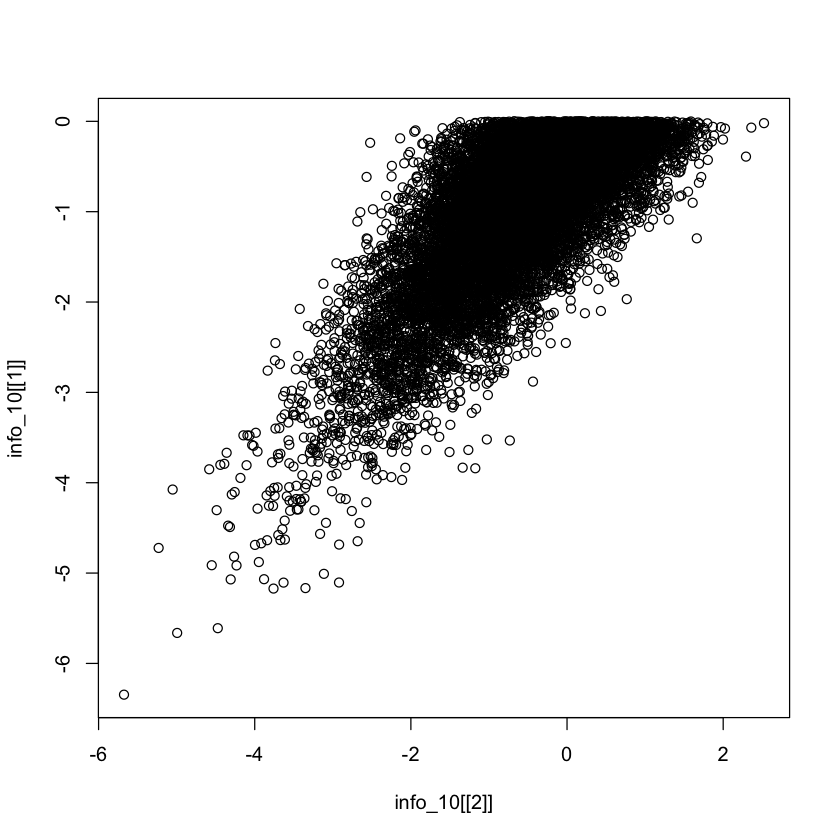

In [56]:
plot(info_10[[2]], info_10[[1]])

In [62]:
length(get_folding_proteins(100)[[1]])

[1] 1263

In [46]:
sum(rnorm(1e5,0.2*100,sqrt(0.3*100))<0) # here 99% of sequences with length 100 fold only because of epistasis

[1] 15

In [43]:
length(get_folding_proteins(1000)[[1]])

[1] 286

In [44]:
length(get_folding_proteins(10000)[[1]])

[1] 244

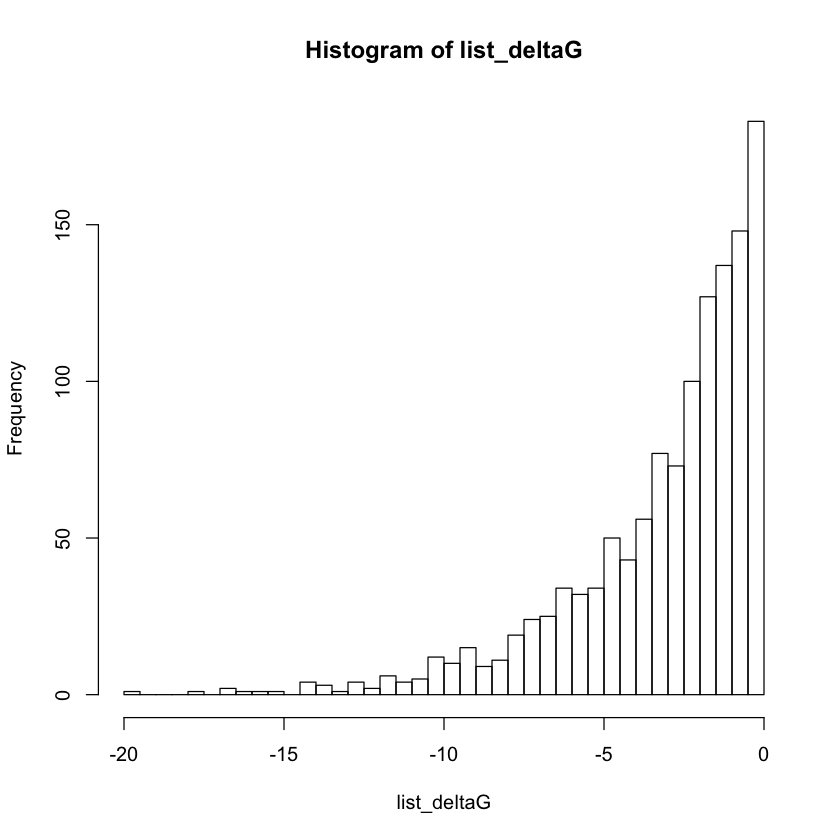

In [21]:
hist(list_deltaG, breaks=50)

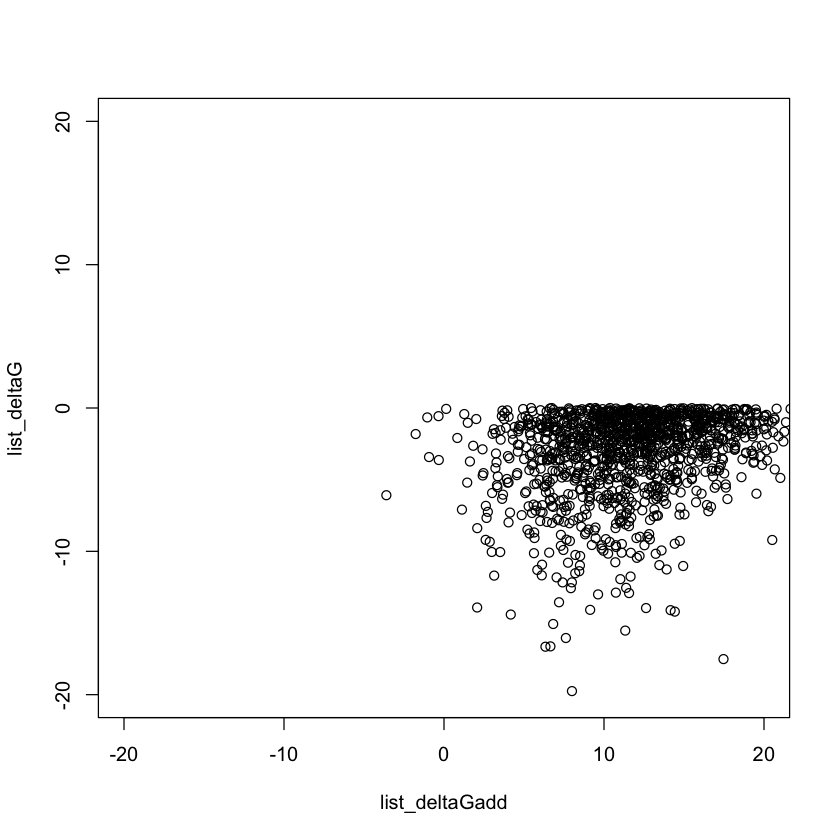

In [24]:
plot(list_deltaGadd, list_deltaG, xlim=c(-20,20), ylim=c(-20,20))

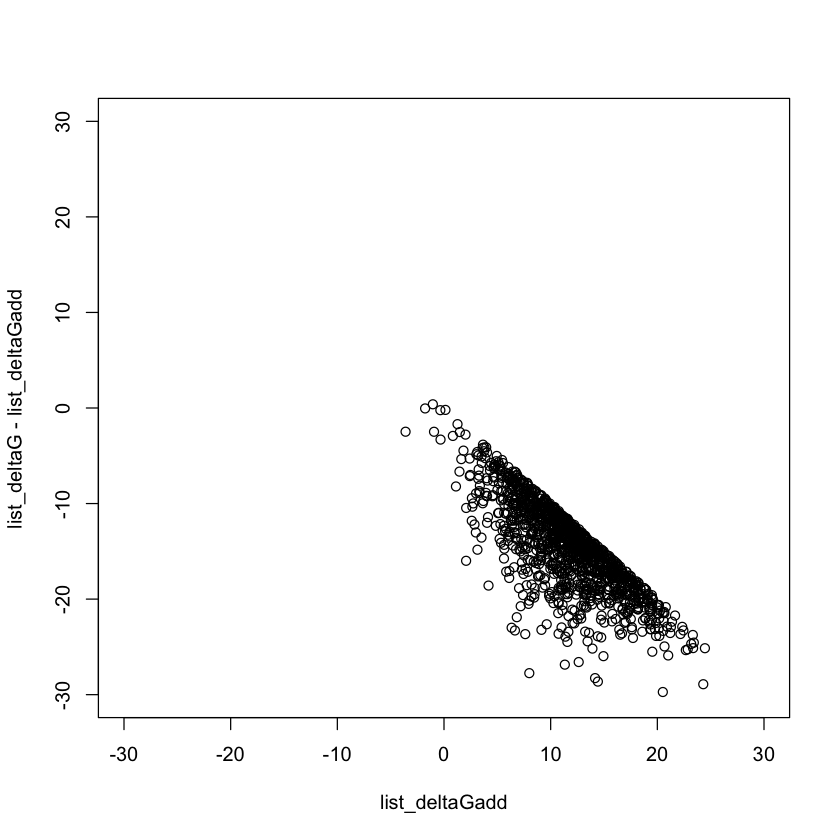

In [29]:
plot(list_deltaGadd, list_deltaG - list_deltaGadd, xlim=c(-30,30), ylim=c(-30,30))